In [1]:
import sys
sys.path.append('/Users/vdk/Software/code/')
import h5py
import pandas as pd
from astropy.table import Table, vstack
import numpy as np
from scipy.interpolate import interp1d
from ctapipe.io import EventSource
import statsmodels.api as sm
from ctapipe.visualization import CameraDisplay
import matplotlib.pyplot as plt
import glob
from python_modules.muonpipe import usefull_func
import seaborn as sns
from ctapipe.image import tailcuts_clean
import scipy.stats as stats
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
    'k'
]

start_date_2019 = datetime.strptime("2019-11-25 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
filename = '/Users/vdk/muons2024/data/for_comparison/nsb_tuning/triple_tuning/run101_muon.simtel.gz'
source = EventSource(filename, max_events = 1)
camgeom = source.subarray.tel[1].camera.geometry


### Base Cuts

In [2]:
size_outside_cut = 500
muon_efficiency_cut = 1
min_impact = 2.2199933748101555
max_impact = 9.983608702234397

### Data loading

In [3]:
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < muon_efficiency_cut) & (df_all_data['size_outside'] < size_outside_cut)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/94_600-1200fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_11869/4086309154.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_11869/4086309154.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_11869/4086309154.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_11869/4086309154.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on impo

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31308385,4843910.0,1.719445e+09,-1.0,1624.1024,8.637733,-0.659971,0.876965,0.848291,0.116848,1.0,...,9.798134,-9.516054,2.334126,0.095898,-0.030282,-0.441889,251.0,0.703649,17.0,0.0
31308386,4849315.0,1.719445e+09,-1.0,2414.9480,0.000000,-0.454369,-0.084192,1.216073,0.040280,1.0,...,7.001510,-5.435892,4.412734,0.042521,0.049803,0.318690,509.0,0.236881,15.0,0.0
31308387,4849722.0,1.719445e+09,-1.0,1970.0897,0.000000,0.253036,0.191820,1.140060,0.090437,1.0,...,9.286253,-0.358254,9.279340,0.067051,-0.067978,-0.366449,449.0,0.183407,18.0,0.0
31308388,4850938.0,1.719445e+09,-1.0,1704.5847,0.000000,0.259656,1.009226,0.828704,0.082265,1.0,...,3.947441,3.907940,-0.557041,0.068710,0.337672,-0.121390,235.0,0.282522,18.0,0.0


In [4]:
ring_completeness_cut = 0.99
ring_containment_cut = 0.3

fits_file = '/Users/vdk/muons2024/data/20240310fits/muons_LST-1.Run17043.fits'

dat = Table.read(fits_file, format='fits')
dat['good_ring'] = dat['good_ring'].astype(bool)
df = dat.to_pandas()
df_good_data = df[(df['muon_efficiency'] < 1) & 
                      (df['size_outside'] < 500)]


event_ids = np.array(list(df_good_data['event_id'][(df_good_data['ring_completeness'] > ring_completeness_cut) &
                                           (df_good_data['ring_containment'] > ring_containment_cut)]))

# This is required for further cuts in the simulations
min_impact = min(df_good_data['impact_parameter'])
max_impact = max(df_good_data['impact_parameter']) 

filename_event_ids = '/Users/vdk/muons2024/data/17043_muons_08complet.txt'
#np.save(filename_event_ids, event_ids)

df_real_data = df_good_data[(df_good_data['ring_completeness'] > ring_completeness_cut) &
                                           (df_good_data['ring_containment'] > ring_containment_cut)]

df_real_data

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
2216,1929684,1.710128e+09,-1,2538.867676,0.000000,-0.717982,-0.129821,1.052612,0.107626,True,...,3.228027,-0.218387,-3.220631,0.081832,0.192543,-0.582250,380,0.283558,16,0
3462,3074516,1.710128e+09,-1,2236.234131,0.000000,-0.510081,-0.242785,1.084624,0.100203,True,...,3.336990,-1.626558,2.913729,0.068887,-0.710905,0.605029,410,0.138582,15,0
4057,3598013,1.710128e+09,-1,2184.545410,17.633835,-0.884146,0.114298,0.968041,0.103545,True,...,3.356751,2.655398,2.053445,0.082603,-0.554250,0.692742,328,0.338109,16,0
4887,4311431,1.710128e+09,-1,2772.918457,0.000000,0.680930,0.278849,1.152954,0.098969,True,...,5.814304,-4.398975,3.801992,0.078647,-0.921647,0.659221,457,0.048409,15,0
5239,4647963,1.710128e+09,-1,3803.775391,0.000000,0.333140,-0.201326,1.172190,0.111590,True,...,5.368568,-1.218072,-5.228558,0.095136,-0.358930,-0.058266,471,0.392924,15,0
5921,5234934,1.710128e+09,-1,2352.560547,0.000000,-0.718453,-0.332185,1.100803,0.088952,True,...,3.318774,1.610205,-2.901982,0.062394,-0.345142,0.588906,420,0.123728,15,0
8378,7424274,1.710129e+09,-1,4213.805176,0.000000,-0.499390,-0.712922,1.186620,0.070106,True,...,6.466958,-5.839439,-2.778938,0.066586,0.204413,-0.170046,474,0.557719,17,0


### One night obs

In [5]:
muon_files = glob.glob('/Users/vdk/muons2024/data/20240310fits/*')

dat = Table.read('{}'.format(muon_files[0]), format='fits')

ring_completeness_cut = 0.3
ring_containment_cut = 0.3

for muon_file in muon_files:
    dat2 = Table.read(muon_file, format='fits')
    dat2['good_ring'] = dat2['good_ring'].astype(bool)
    dat = vstack([dat, dat2])

df = dat.to_pandas()
df_real_data_stacked = df[(df['muon_efficiency'] < 1) & 
                      (df['size_outside'] < 500) &
                      (df['ring_completeness'] > ring_completeness_cut) &
                      (df['ring_containment'] > ring_containment_cut)]


df_real_data_stacked

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,1604,1.710132e+09,-1,1744.200439,0.000000,1.029261,0.103371,1.145736,0.065134,True,...,7.077620,-6.629635,-2.478032,0.052999,0.107686,-0.116285,428,0.187042,14,0
1,1668,1.710132e+09,-1,1335.293335,0.000000,-1.578611,0.055369,1.092381,0.086799,True,...,8.001635,-2.697525,7.533228,0.074952,-0.488940,-0.352933,282,0.354082,15,0
2,2028,1.710132e+09,-1,1354.678833,0.000000,1.947185,0.360542,1.165416,0.058037,True,...,3.566550,2.489037,-2.554402,0.051385,-0.398437,-0.232205,250,0.395785,13,0
3,2145,1.710132e+09,-1,2076.476562,0.000000,-0.069449,-0.121029,1.143732,0.063783,True,...,6.400993,2.176264,-6.019683,0.054272,-0.197158,-0.328986,452,0.007566,17,0
4,2506,1.710132e+09,-1,1600.680542,0.000000,-1.424532,-0.131362,0.960453,0.043076,True,...,6.143145,4.650406,4.013970,0.044191,0.138457,-0.097690,264,0.267984,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130639,5122351,1.710130e+09,-1,1591.459717,5.093948,-1.154355,0.648782,1.060856,0.075769,True,...,6.790782,0.672718,-6.757379,0.066409,-0.731503,0.686672,331,0.615733,15,0
130640,5122959,1.710130e+09,-1,1695.671143,0.000000,1.257041,-0.000501,1.000707,0.074163,True,...,4.232687,3.208891,-2.760191,0.054925,0.346438,0.855734,316,0.511593,16,0
130641,5123952,1.710130e+09,-1,2444.296875,0.000000,0.260299,0.889161,1.209560,0.046808,True,...,4.452804,-3.108113,3.188588,0.044073,0.088804,0.676573,483,0.223399,15,0
130642,5124080,1.710130e+09,-1,1827.315674,0.000000,1.339442,0.109561,1.017641,0.048687,True,...,5.726537,5.250035,2.286997,0.048419,-0.070269,-0.593410,307,0.303413,15,0


### 1 sim loading

In [6]:
global_cor_nsbtune_fits_file = '/Users/vdk/muons2024/config_comparison/integration_correction/triple_tuning/muon_table_run1_nsb_tune.fits'
global_cor_nsbtune_dl1_file = '/Users/vdk/muons2024/config_comparison/integration_correction/triple_tuning/dl1_run101_muon.h5'

ring_completeness_cut = 0.8
ring_containment_cut = 0.99

dat = Table.read(global_cor_nsbtune_fits_file, format='fits')
dat['good_ring'] = dat['good_ring'].astype(bool)
df = dat.to_pandas()
df_good_data = df[(df['muon_efficiency'] < muon_efficiency_cut) & 
                  (df['size_outside'] < size_outside_cut) & 
                  (df['impact_parameter'] < max_impact) &
                  (df['impact_parameter'] > min_impact)
                 ]


event_ids = np.array(list(df_good_data['event_id'][(df_good_data['ring_completeness'] > ring_completeness_cut) &
                                           (df_good_data['ring_containment'] > ring_containment_cut) &
                                            (df_good_data['impact_parameter'] < max_impact) &
                                           (df_good_data['impact_parameter'] > min_impact)]))

df_sim_data_global_integration_cor_nsbtune = df_good_data
                                        

global_cor_nsbtune_sim_dl1_image = []
global_cor_nsbtune_sim_dl1_peak_time = []
global_cor_nsbtune_sim_dl1_image_mask = []

with h5py.File(global_cor_nsbtune_dl1_file, 'r') as f:
    dataset = f['dl1/event/telescope/image/LST_LSTCam']
    data = dataset[:]
    
    for event_record in data:
        if event_record[1] in event_ids:
            global_cor_nsbtune_sim_dl1_image.append(event_record[2])
            global_cor_nsbtune_sim_dl1_peak_time.append(event_record[3])
            global_cor_nsbtune_sim_dl1_image_mask.append(event_record[4])
        #if len(global_cor_nsbtune_sim_dl1_image) == 542:
        #    break


df_sim_data_global_integration_cor_nsbtune

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,100,NaN,0.008763,2176.596924,0.0,0.068080,0.417578,0.968293,0.045753,True,...,3.841884,2.490532,2.925290,0.047270,0.027732,-0.576133,327,-0.161059,NaN,NaN
1,101,NaN,0.008763,2118.988770,0.0,0.068517,0.419387,0.972654,0.045580,True,...,5.547527,2.301602,5.047542,0.048577,-0.031611,-0.425874,330,-0.083750,NaN,NaN
3,103,NaN,0.008763,1975.947510,0.0,0.062257,0.408752,0.971074,0.043012,True,...,7.053833,6.119546,-3.508236,0.044187,-0.121618,0.102733,328,0.100043,NaN,NaN
4,200,NaN,0.052592,2465.037109,0.0,-0.131686,0.733427,1.226170,0.045130,True,...,7.581557,6.339811,-4.157739,0.047232,0.426752,0.255968,518,0.099574,NaN,NaN
5,201,NaN,0.052592,2321.311523,0.0,-0.132630,0.768625,1.261334,0.032029,True,...,8.594581,2.546031,8.208810,0.038949,0.137298,-0.467520,546,-0.069325,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26482,629304,NaN,0.010856,1974.426270,0.0,0.212548,0.801512,1.133091,0.088244,True,...,8.499554,1.142883,8.422365,0.066771,-0.231601,-0.331300,446,0.172713,NaN,NaN
26483,629400,NaN,0.035942,2530.952148,0.0,0.606632,0.083989,1.216591,0.026990,True,...,4.641159,-0.535081,4.610211,0.035316,0.092645,-0.168197,511,0.148806,NaN,NaN
26485,629402,NaN,0.035942,2716.953125,0.0,0.603878,0.072300,1.209012,0.026450,True,...,3.029755,-1.027730,2.850121,0.035864,0.099958,0.613985,507,-0.009665,NaN,NaN
26486,629403,NaN,0.035942,2446.482666,0.0,0.633675,0.067483,1.239271,0.032342,True,...,8.109921,-7.833516,2.099248,0.039642,0.174447,0.327530,534,-0.036188,NaN,NaN


### List of fits sim files loading

#### NSB tuned to years

In [5]:
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2020/tables/*')
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2021/tables/*')
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2022/tables/*')
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2023/tables/*')
listdir= glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/nsb_tune_2024_year_no_outliers/tables/*')

listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2020year_tuned_reflectivity/tables/*')
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2021year_tuned_reflectivity/tables/*')
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2023year_tuned_reflectivity/tables/*')
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2024year_tuned_reflectivity/tables/*')

dat = Table.read('{}'.format(listdir[0]), format='fits')

for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])

df = dat.to_pandas()
df_sim_2024_tune = df[df['good_ring'] & (df['muon_efficiency'] < muon_efficiency_cut) & (df['size_outside'] < size_outside_cut)]
df_sim_2024_tune

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,100,NaN,0.023803,2501.871338,0.0,-0.214498,-0.782758,1.198219,0.040690,True,...,5.183425,-3.329351,-3.972823,0.041452,0.493347,-0.372735,489,-0.029766,NaN,NaN
1,101,NaN,0.023803,2504.850586,0.0,-0.211201,-0.776545,1.186740,0.033321,True,...,3.280628,-3.227235,-0.589466,0.041010,0.347271,-0.586739,482,0.068721,NaN,NaN
2,102,NaN,0.023803,2040.053833,0.0,-0.232049,-0.788526,1.220426,0.035211,True,...,8.778308,7.926207,-3.772789,0.039787,0.210744,-0.735107,507,0.133870,NaN,NaN
3,103,NaN,0.023803,2712.278564,0.0,-0.235484,-0.768943,1.194841,0.023702,True,...,4.578258,3.303239,3.170025,0.034369,0.220551,0.393131,491,-0.057473,NaN,NaN
4,104,NaN,0.023803,2525.781250,0.0,-0.226769,-0.774547,1.184794,0.041925,True,...,6.518219,-1.078635,6.428353,0.043871,0.336848,0.135584,484,-0.016202,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386795,532602,NaN,0.015264,2621.745361,0.0,-0.456607,-0.843046,1.140756,0.033198,True,...,3.957790,-1.736350,3.556570,0.037565,0.239338,0.061160,439,-0.005949,NaN,NaN
386796,532603,NaN,0.015264,2421.743652,0.0,-0.473171,-0.846846,1.148252,0.048502,True,...,5.298855,5.263330,0.612552,0.049796,0.372941,-0.191834,438,0.038985,NaN,NaN
386797,532604,NaN,0.015264,2196.527100,0.0,-0.476618,-0.846767,1.160507,0.050584,True,...,7.192300,7.138916,-0.874673,0.051545,0.180497,-0.348355,447,-0.038492,NaN,NaN
386798,532700,NaN,0.032855,2658.559082,0.0,-0.395674,0.442068,1.208405,0.034074,True,...,2.263907,-0.249364,2.250132,0.039068,0.024092,-0.326522,503,0.012935,NaN,NaN


In [6]:
listdir= glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/no_tune_zenith_10/muon_tables/*')
dat = Table.read('{}'.format(listdir[0]), format='fits')

for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])

df = dat.to_pandas()
df_sim_zenith10 = df[df['good_ring'] & (df['muon_efficiency'] < muon_efficiency_cut) & (df['size_outside'] < size_outside_cut)]
df_sim_zenith10

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,100,NaN,0.023803,2498.328613,0.000000,-0.213953,-0.780916,1.198929,0.040093,True,...,5.822013,-3.987019,-4.242584,0.043369,0.424236,-0.287120,491,0.014198,NaN,NaN
2,102,NaN,0.023803,2142.513184,0.000000,-0.246245,-0.780299,1.229475,0.030081,True,...,8.825989,7.761599,-4.201864,0.039077,0.285815,-0.554465,515,-0.211862,NaN,NaN
3,103,NaN,0.023803,2626.202393,0.000000,-0.233615,-0.768595,1.193799,0.021440,True,...,5.350353,4.400860,3.042813,0.032365,0.155699,-0.113800,490,0.047176,NaN,NaN
4,104,NaN,0.023803,2614.636230,0.000000,-0.220220,-0.767831,1.189429,0.046792,True,...,6.228566,-1.467908,6.053121,0.046398,0.460514,0.517414,482,-0.046296,NaN,NaN
5,200,NaN,0.010941,2356.789307,0.000000,0.135845,-0.161139,1.067309,0.036161,True,...,3.065804,-1.331073,-2.761775,0.041246,-0.050769,-0.501808,395,-0.024622,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494633,662204,NaN,0.021408,2531.930908,0.000000,0.438124,0.367930,1.182675,0.048336,True,...,5.827458,5.500282,1.925141,0.049730,0.080633,-0.271776,488,-0.052802,NaN,NaN
494636,662302,NaN,0.008607,1467.794189,0.000000,0.017704,-0.911292,0.910812,0.088456,True,...,9.727667,8.696152,-4.359409,0.075265,-0.186956,-0.281316,285,0.457733,NaN,NaN
494637,662303,NaN,0.008607,1893.174072,0.000000,-0.042601,-0.937747,0.938243,0.072638,True,...,2.492600,-0.954779,-2.302489,0.057808,0.314752,0.433068,303,0.016987,NaN,NaN
494638,662304,NaN,0.008607,1934.187744,0.000000,-0.089516,-0.918365,0.951916,0.080661,True,...,3.834043,3.818927,-0.340124,0.062401,-0.010657,0.330658,309,0.232523,NaN,NaN


### Creating dataframes with cuts to plot

In [7]:
ring_containment_cut = 0.3
ring_completeness_cut = 0.99
min_radius_cut = 0.95
max_radius_cut = 1.15


df_real_data_cut_2020 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2020) &
    (df_good_data_real['event_time'] < end_date_2020)
]

# df_real_data_cut = df_good_data_real[ 
#     (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
#     (df_good_data_real['ring_containment'] > ring_containment_cut) &
#     (df_good_data_real['ring_radius'] > min_radius_cut) &  
#     (df_good_data_real['ring_radius'] < max_radius_cut) &  
#     (df_good_data_real['event_time'] > start_date_2022) &
#     (df_good_data_real['event_time'] < end_date_2022)
# ]

df_real_data_cut_2021 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2021) &
    (df_good_data_real['event_time'] < end_date_2021)
]

df_real_data_cut_2022 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2022) &
    (df_good_data_real['event_time'] < end_date_2022)
]

df_real_data_cut_2023 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2023) &
    (df_good_data_real['event_time'] < end_date_2023)
]

df_real_data_cut_2024 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2024) &
    (df_good_data_real['event_time'] < end_date_2024)
]

# df_sim_cut_nsbtune = df_sim_data_global_integration_cor_nsbtune[
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] > min_radius_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] < max_radius_cut) &
#     (df_sim_data_global_integration_cor_nsbtune['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_containment'] > ring_containment_cut) 
# ]

# df_sim_cut = df_sim_zenith10[
#     (df_sim_zenith10['ring_radius'] > min_radius_cut) & 
#     (df_sim_zenith10['ring_radius'] < max_radius_cut) &
#     (df_sim_zenith10['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_zenith10['ring_containment'] > ring_containment_cut) 
# ]

df_sim_cut_2024_tune = df_sim_2024_tune[
    (df_sim_2024_tune['ring_radius'] > min_radius_cut) & 
    (df_sim_2024_tune['ring_radius'] < max_radius_cut) &
    (df_sim_2024_tune['ring_completeness'] > ring_completeness_cut) & 
    (df_sim_2024_tune['ring_containment'] > ring_containment_cut) 
]





#print(f"Size of the sim dataset {len(df_sim_cut)}")
print(f"Size of the sim 2024 tune dataset {len(df_sim_cut_2024_tune)}")
#print(f"Size of the obs dataset {len(df_real_data_cut)}")



Size of the sim 2024 tune dataset 567


## Plotting of the regression data vs sim

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_11869/2970363439.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_11869/2970363439.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


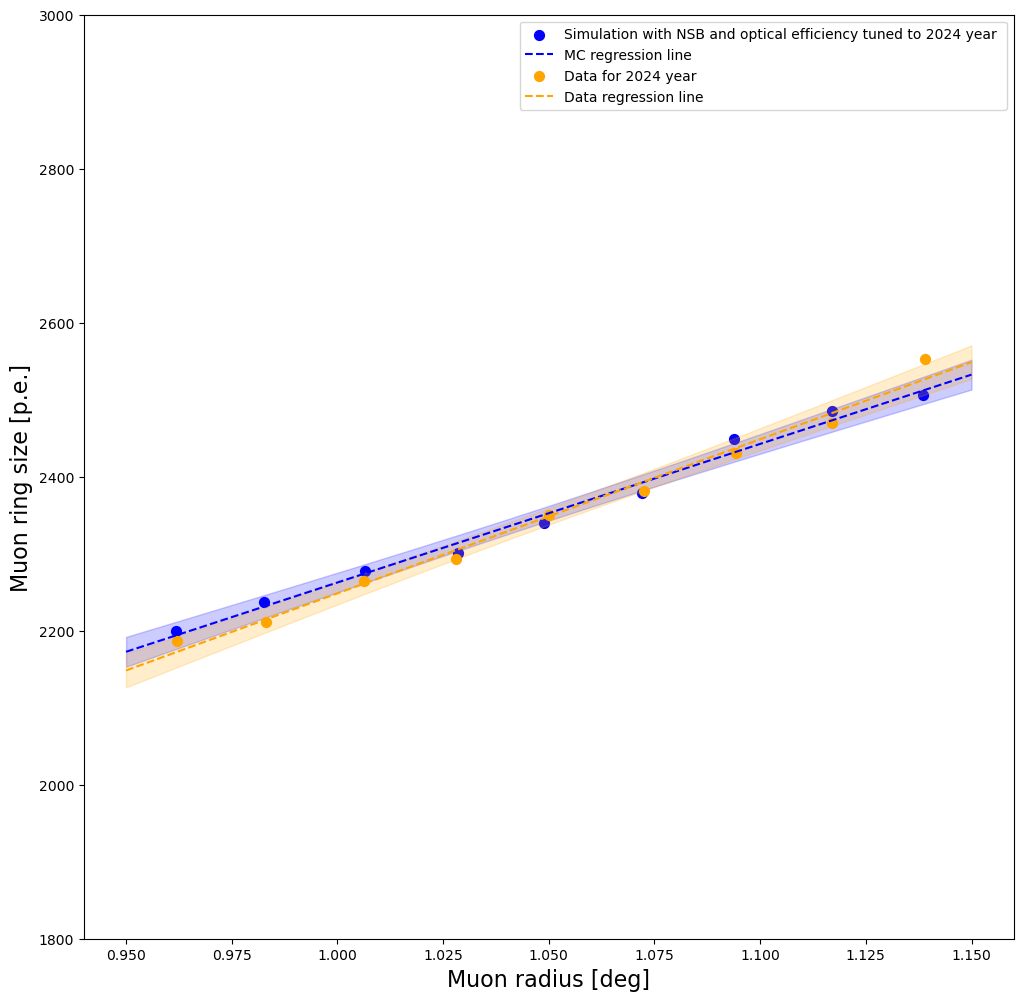

In [11]:
year_value = 2024
data_mc = df_sim_cut_2024_tune
# data_mc = df_sim_data_global_integration_cor_nsbtune[
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] > min_radius_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] < max_radius_cut) &
#     (df_sim_data_global_integration_cor_nsbtune['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_containment'] > ring_containment_cut) 
# ]
data_run = eval(f"df_real_data_cut_{year_value}")
#data_run = df_real_data_stacked

# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_mc['ring_size'] = binned_mc['ring_size'] * 0.998
binned_mc['constant'] = 1
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()


# # Bin the data for MC
# df_real_data_cut_2021['binned_radius'] = pd.cut(df_real_data_cut_2021['ring_radius'], bins, include_lowest=True, labels=False)
# binned_data_2021 = df_real_data_cut_2021.groupby('binned_radius').agg({
#     'ring_radius': 'mean',
#     'ring_size': 'mean'
# })
# binned_data_2021['ring_size'] = binned_data_2021['ring_size']
# binned_data_2021['constant'] = 1
# model_data_2021 = sm.OLS(binned_data_2021['ring_size'], binned_data_2021[['constant', 'ring_radius']]).fit()
# # Generate y values and confidence intervals using the regression models
# y_values_data_2021 = model_data_2021.predict(x_values_with_const)
# prediction_data_2021 = model_data_2021.get_prediction(x_values_with_const)
# conf_int_mc_2021 = prediction_data_2021.conf_int()


# Bin the data for Run
data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
binned_run = data_run.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run['constant'] = 1
model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
y_values_run = model_run.predict(x_values_with_const)
prediction_run = model_run.get_prediction(x_values_with_const)
conf_int_run = prediction_run.conf_int()


# Plotting
plt.figure(figsize=(12, 12))

# Plotting MC data
plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Simulation with NSB and optical efficiency tuned to 2024 year ', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--', label='MC regression line')
plt.fill_between(x_values, conf_int_mc[:, 0], conf_int_mc[:, 1], color='blue', alpha=0.2)

# plt.scatter(binned_data_2021['ring_radius'], binned_data_2021['ring_size'], color='blue', label='Simulation with tuned NSB to Run17043 (0.31 GHz)', s=50)
# plt.plot(x_values, y_values_data_2021, color='blue', linestyle='--', label='MC regression line')
# plt.fill_between(x_values, conf_int_data_2021[:, 0], conf_int_data_2021[:, 1], color='', alpha=0.2)

# Plotting Data Run
plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], color='orange', label=f'Data for {year_value} year', s=50)

plt.plot(x_values, y_values_run, color='orange', linestyle='--', label='Data regression line')
plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], color='orange', alpha=0.2)


# Adding labels and legend
plt.xlabel('Muon radius [deg]',fontsize=16)
plt.ylabel('Muon ring size [p.e.]',fontsize=16)
plt.legend()
plt.ylim(1800,3000)
#plt.grid(alpha=0.5)
#plt.title(f"Quality cuts containment > {ring_containment_cut} completeness > {ring_completeness_cut}")
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/cuts_investigation/2022tune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')
#plt.savefig(f'/Users/vdk/muons2024/images/AA_paper/2024tune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

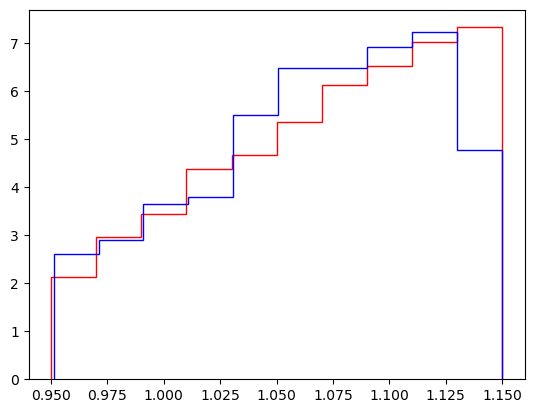

In [211]:
z,x,c = plt.hist(df_real_data_cut_2022['ring_radius'], bins=10, histtype='step', color='r', label='2022',density=True)
z,x,c = plt.hist(df_sim_cut_2024_tune['ring_radius'], bins=10, histtype='step', color='b', label='2022', density=True)

### Slope of the regressiobn line

In [73]:
#x_values,y_values_run

In [75]:
slope = model_mc.params['ring_radius']
# in p.e. per degree
slope

1801.130533297918

In [83]:
np.degrees(np.arctan(slope/1000))

60.9606656442531

In [79]:
print(f"2020 year: Size of the cutted dataset  {len(df_real_data_cut_2020)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2020) & (df_good_data_real['event_time'] < end_date_2020)])} "
      f"which means {round(len(df_real_data_cut_2020)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2020) & (df_good_data_real['event_time'] < end_date_2020)])*100,3)} %")

print(f"2021 year: Size of the cutted dataset  {len(df_real_data_cut_2021)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2021) & (df_good_data_real['event_time'] < end_date_2021)])} "
      f"which means {round(len(df_real_data_cut_2021)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2021) & (df_good_data_real['event_time'] < end_date_2021)])*100,3)} %")

print(f"2022 year: Size of the cutted dataset {len(df_real_data_cut_2022)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2022) & (df_good_data_real['event_time'] < end_date_2022)])} "
      f"which means {round(len(df_real_data_cut_2022)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2022) & (df_good_data_real['event_time'] < end_date_2022)])*100,3)} %")
      
print(f"2023 year: Size of the cutted dataset {len(df_real_data_cut_2023)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2023) & (df_good_data_real['event_time'] < end_date_2023)])} "
      f"which means {round(len(df_real_data_cut_2023)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2023) & (df_good_data_real['event_time'] < end_date_2023)])*100,3)} %")

print(f"2024 year: Size of the cutted dataset  {len(df_real_data_cut_2024)} vs whole dataset " 
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2024) & (df_good_data_real['event_time'] < end_date_2024)])} "
      f"which means {round(len(df_real_data_cut_2024)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2024) & (df_good_data_real['event_time'] < end_date_2024)])*100,3)} %")

2020 year: Size of the cutted dataset  3417 vs whole dataset 854903 which means 0.4 %
2021 year: Size of the cutted dataset  6616 vs whole dataset 2583827 which means 0.256 %
2022 year: Size of the cutted dataset 12656 vs whole dataset 7920965 which means 0.16 %
2023 year: Size of the cutted dataset 15623 vs whole dataset 11948822 which means 0.131 %
2024 year: Size of the cutted dataset  7904 vs whole dataset 7939138 which means 0.1 %


#### For all years in one plot to trace the changes

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/3746546389.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/3746546389.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2020['binned_radius'] = pd.cut(df_real_data_cut_2020['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9g

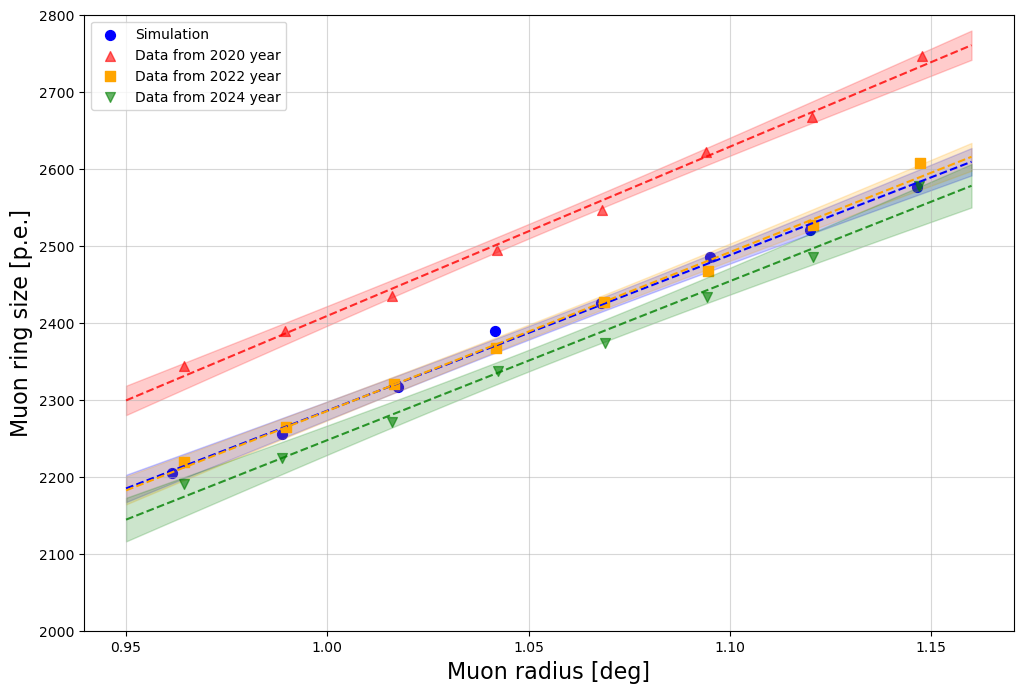

In [137]:

data_mc = df_sim_cut



# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 9)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_mc['ring_size'] = binned_mc['ring_size']
binned_mc['constant'] = 1
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()
# Generate y values and confidence intervals using the regression models
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()


# Bin the data for 2020 year
df_real_data_cut_2020['binned_radius'] = pd.cut(df_real_data_cut_2020['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2020 = df_real_data_cut_2020.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2020['constant'] = 1
model_run = sm.OLS(binned_run_2020['ring_size'], binned_run_2020[['constant', 'ring_radius']]).fit()
y_values_run_2020 = model_run.predict(x_values_with_const)
prediction_run_2020 = model_run.get_prediction(x_values_with_const)
conf_int_run_2020 = prediction_run_2020.conf_int()

# Bin the data for 2021 year
df_real_data_cut_2021['binned_radius'] = pd.cut(df_real_data_cut_2021['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2021 = df_real_data_cut_2021.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2021['constant'] = 1
model_run = sm.OLS(binned_run_2021['ring_size'], binned_run_2021[['constant', 'ring_radius']]).fit()
y_values_run_2021 = model_run.predict(x_values_with_const)
prediction_run_2021 = model_run.get_prediction(x_values_with_const)
conf_int_run_2021 = prediction_run_2021.conf_int()

# Bin the data for 2022 year
df_real_data_cut_2022['binned_radius'] = pd.cut(df_real_data_cut_2022['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2022 = df_real_data_cut_2022.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2022['constant'] = 1
model_run = sm.OLS(binned_run_2022['ring_size'], binned_run_2022[['constant', 'ring_radius']]).fit()
y_values_run_2022 = model_run.predict(x_values_with_const)
prediction_run_2022 = model_run.get_prediction(x_values_with_const)
conf_int_run_2022 = prediction_run_2022.conf_int()

# Bin the data for 2023 year
df_real_data_cut_2023['binned_radius'] = pd.cut(df_real_data_cut_2023['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2023 = df_real_data_cut_2023.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2023['constant'] = 1
model_run = sm.OLS(binned_run_2023['ring_size'], binned_run_2023[['constant', 'ring_radius']]).fit()
y_values_run_2023 = model_run.predict(x_values_with_const)
prediction_run_2023 = model_run.get_prediction(x_values_with_const)
conf_int_run_2023= prediction_run_2023.conf_int()

# Bin the data for 2024 year
df_real_data_cut_2024['binned_radius'] = pd.cut(df_real_data_cut_2024['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2024 = df_real_data_cut_2024.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2024['constant'] = 1
model_run = sm.OLS(binned_run_2024['ring_size'], binned_run_2024[['constant', 'ring_radius']]).fit()
y_values_run_2024 = model_run.predict(x_values_with_const)
prediction_run_2024 = model_run.get_prediction(x_values_with_const)
conf_int_run_2024 = prediction_run_2024.conf_int()


# Plotting
plt.figure(figsize=(12, 8))



# Plotting MC data
plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Simulation', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--')
plt.fill_between(x_values, conf_int_mc[:, 0], conf_int_mc[:, 1], color='blue', alpha=0.2)


plt.scatter(binned_run_2020['ring_radius'], binned_run_2020['ring_size'], color='red', label='Data from 2020 year', s=50, alpha=0.6, marker = '^')
plt.plot(x_values, y_values_run_2020, color='red', linestyle='--', alpha=0.8)
plt.fill_between(x_values, conf_int_run_2020[:, 0], conf_int_run_2020[:, 1], color='red', alpha=0.2)


# #plt.scatter(binned_run_2021['ring_radius'], binned_run_2021['ring_size'], color='green', label='Data from 20221year', s=50)
# plt.plot(x_values, y_values_run_2021, color='green', linestyle='--', alpha=0.8, label='Data from 2021 year')


# # Plotting Data Run
plt.scatter(binned_run_2022['ring_radius'], binned_run_2022['ring_size'], color='orange', label='Data from 2022 year', s=50, marker = 's')
plt.plot(x_values, y_values_run_2022, color='orange', linestyle='--')
plt.fill_between(x_values, conf_int_run_2022[:, 0], conf_int_run_2022[:, 1], color='orange', alpha=0.2)


#plt.scatter(binned_run_2023['ring_radius'], binned_run_2023['ring_size'], color='violet', label='Data from 2023 year', s=50, alpha=0.6)
# plt.plot(x_values, y_values_run_2023, color='violet', linestyle='--', alpha=0.8, label='Data from 2023 year')



plt.scatter(binned_run_2024['ring_radius'], binned_run_2024['ring_size'], color='green', label='Data from 2024 year', s=50, alpha=0.6, marker = 'v')
plt.plot(x_values, y_values_run_2024, color='green', linestyle='--', alpha=0.8)
plt.fill_between(x_values, conf_int_run_2024[:, 0], conf_int_run_2024[:, 1], color='green', alpha=0.2)

# Adding labels and legend
plt.xlabel('Muon radius [deg]',fontsize=16)
plt.ylabel('Muon ring size [p.e.]',fontsize=16)
plt.legend()
plt.ylim(2000,2800)
plt.grid(alpha=0.5)
#plt.title(f"Quality cuts containment = {ring_containment_cut} completeness = {ring_completeness_cut}")
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/cuts_investigation/three_years_one_plot_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

### Normalization of the data to extract the correct slope

In [ ]:
data_mc = df_sim_cut

# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 9)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_mc['ring_size'] = binned_mc['ring_size']
binned_mc['constant'] = 1
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()
# Generate y values and confidence intervals using the regression models
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()


# Bin the data for 2020 year
df_real_data_cut_2020['binned_radius'] = pd.cut(df_real_data_cut_2020['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2020 = df_real_data_cut_2020.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2020['constant'] = 1
model_run = sm.OLS(binned_run_2020['ring_size'], binned_run_2020[['constant', 'ring_radius']]).fit()
y_values_run_2020 = model_run.predict(x_values_with_const)
prediction_run_2020 = model_run.get_prediction(x_values_with_const)
conf_int_run_2020 = prediction_run_2020.conf_int()

# Bin the data for 2021 year
df_real_data_cut_2021['binned_radius'] = pd.cut(df_real_data_cut_2021['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2021 = df_real_data_cut_2021.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2021['constant'] = 1
model_run = sm.OLS(binned_run_2021['ring_size'], binned_run_2021[['constant', 'ring_radius']]).fit()
y_values_run_2021 = model_run.predict(x_values_with_const)
prediction_run_2021 = model_run.get_prediction(x_values_with_const)
conf_int_run_2021 = prediction_run_2021.conf_int()

# Bin the data for 2022 year
df_real_data_cut_2022['binned_radius'] = pd.cut(df_real_data_cut_2022['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2022 = df_real_data_cut_2022.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2022['constant'] = 1
model_run = sm.OLS(binned_run_2022['ring_size'], binned_run_2022[['constant', 'ring_radius']]).fit()
y_values_run_2022 = model_run.predict(x_values_with_const)
prediction_run_2022 = model_run.get_prediction(x_values_with_const)
conf_int_run_2022 = prediction_run_2022.conf_int()

# Bin the data for 2023 year
df_real_data_cut_2023['binned_radius'] = pd.cut(df_real_data_cut_2023['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2023 = df_real_data_cut_2023.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2023['constant'] = 1
model_run = sm.OLS(binned_run_2023['ring_size'], binned_run_2023[['constant', 'ring_radius']]).fit()
y_values_run_2023 = model_run.predict(x_values_with_const)
prediction_run_2023 = model_run.get_prediction(x_values_with_const)
conf_int_run_2023= prediction_run_2023.conf_int()

# Bin the data for 2024 year
df_real_data_cut_2024['binned_radius'] = pd.cut(df_real_data_cut_2024['ring_radius'], bins, include_lowest=True, labels=False)
binned_run_2024 = df_real_data_cut_2024.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run_2024['constant'] = 1
model_run = sm.OLS(binned_run_2024['ring_size'], binned_run_2024[['constant', 'ring_radius']]).fit()
y_values_run_2024 = model_run.predict(x_values_with_const)
prediction_run_2024 = model_run.get_prediction(x_values_with_const)
conf_int_run_2024 = prediction_run_2024.conf_int()

In [149]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Function to normalize a column in a DataFrame
def normalize(column):
    return (column - column.mean()) / column.std()

# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 9)

# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)

# Normalize x_values
x_values_norm = (x_values - np.mean(x_values)) / np.std(x_values)
x_values_with_const = sm.add_constant(x_values_norm)

# List of DataFrames for each year
dataframes = [df_real_data_cut_2020, df_real_data_cut_2021, df_real_data_cut_2022, df_real_data_cut_2023, df_real_data_cut_2024]
models = {}
predictions = {}
conf_ints = {}

# Process each year
for year, df in zip([2020, 2021, 2022, 2023, 2024], dataframes):
    df['binned_radius'] = pd.cut(df['ring_radius'], bins, include_lowest=True, labels=False)
    binned_df = df.groupby('binned_radius').agg({
        'ring_radius': 'mean',
        'ring_size': 'mean'
    })

    # Normalize the binned data
    binned_df['ring_radius'] = normalize(binned_df['ring_radius'])
    binned_df['ring_size'] = normalize(binned_df['ring_size'])
    binned_df['constant'] = 1

    # Fit the model
    model = sm.OLS(binned_df['ring_size'], binned_df[['constant', 'ring_radius']]).fit()
    models[year] = model

    # Generate predictions and confidence intervals
    y_values = model.predict(x_values_with_const)
    prediction = model.get_prediction(x_values_with_const)
    conf_int = prediction.conf_int()

    predictions[year] = y_values
    conf_ints[year] = conf_int

    # Print the slope of the regression line
    slope = model.params['ring_radius']
    angle = np.arctan(slope) * (180 / np.pi)
    print(f"Slope of the regression line for {year}: {slope}")
    print(f"Angle of the regression line for {year}: {angle} degrees")

# Example for MC data
data_mc = df_sim_cut
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})

# Normalize the binned data
binned_mc['ring_radius'] = normalize(binned_mc['ring_radius'])
binned_mc['ring_size'] = normalize(binned_mc['ring_size'])
binned_mc['constant'] = 1

# Fit the model
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()

# Generate predictions and confidence intervals
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()

# Print the slope of the regression line for MC data
slope_mc = model_mc.params['ring_radius']
angle_mc = np.arctan(slope_mc) * (180 / np.pi)
print(f"Slope of the regression line for MC data: {slope_mc}")
print(f"Angle of the regression line for MC data: {angle_mc} degrees")

# Store results for MC data
predictions['MC'] = y_values_mc
conf_ints['MC'] = conf_int_mc

# Now you can use the 'models', 'predictions', and 'conf_ints' dictionaries for further analysis or plotting

Slope of the regression line for 2020: 0.9974266247731656
Angle of the regression line for 2020: 44.9261832919441 degrees
Slope of the regression line for 2021: 0.9945446360624508
Angle of the regression line for 2021: 44.84328826528256 degrees
Slope of the regression line for 2022: 0.99735861762332
Angle of the regression line for 2022: 44.92422994413447 degrees
Slope of the regression line for 2023: 0.9926240299109005
Angle of the regression line for 2023: 44.7879128127702 degrees
Slope of the regression line for 2024: 0.9936425013980568
Angle of the regression line for 2024: 44.81729091189024 degrees
Slope of the regression line for MC data: 0.9973629373422426
Angle of the regression line for MC data: 44.924354022002916 degrees


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/1460918029.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binned_radius'] = pd.cut(df['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/1460918029.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binned_radius'] = pd.cut(df['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/1460918029.py:

In [147]:
np.mean(binned_mc['ring_size'])

2396.6262

In [16]:
prediction_run_2024

Normalization (intercept) for 2020: 248.36323409466604
Normalization (intercept) for 2021: 151.05521635763853
Normalization (intercept) for 2022: 285.3407239943499
Normalization (intercept) for 2023: 360.88310101234856
Normalization (intercept) for 2024: 251.25328429214642
Normalization (intercept) for mc: 231.98428427601903
Difference in normalization between 2022 and 2024: -34.08743970220348


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_27506/535939941.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binned_radius'] = pd.cut(data['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_27506/535939941.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binned_radius'] = pd.cut(data['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_27506/53593

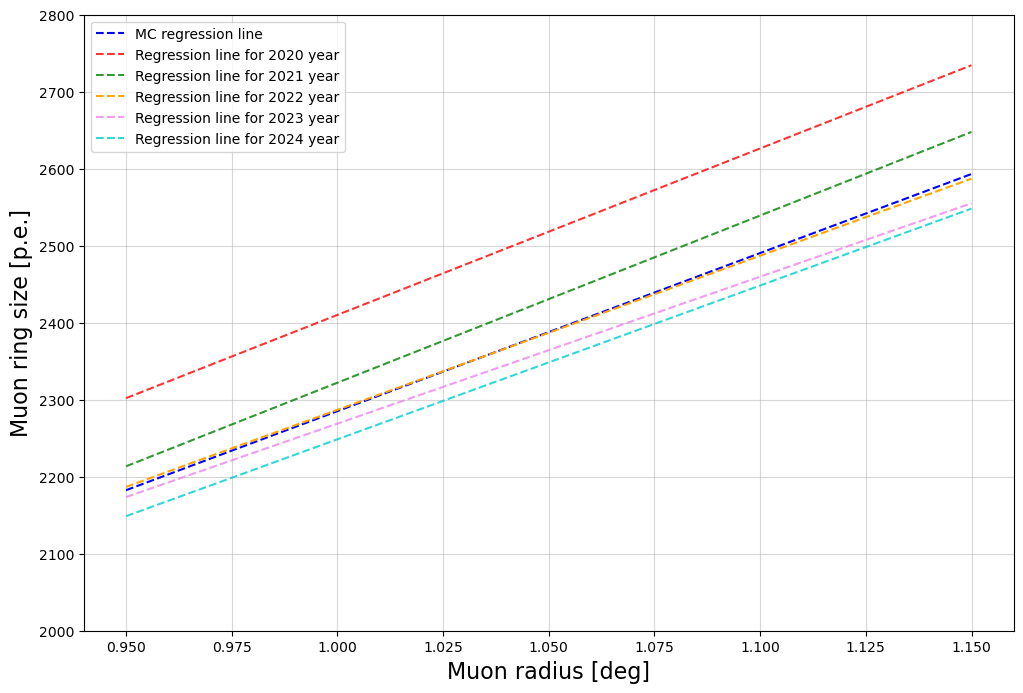

In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming data_mc, df_real_data_cut_2020, df_real_data_cut_2021, df_real_data_cut_2022, df_real_data_cut_2023, df_real_data_cut_2024, min_radius_cut, max_radius_cut are already defined

data_mc = df_sim_cut
# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 9)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)

# Function to fit OLS model and return intercept and other relevant values
def fit_ols_model(data, bins):
    data['binned_radius'] = pd.cut(data['ring_radius'], bins, include_lowest=True, labels=False)
    binned_data = data.groupby('binned_radius').agg({
        'ring_radius': 'mean',
        'ring_size': 'mean'
    })
    binned_data['constant'] = 1
    model = sm.OLS(binned_data['ring_size'], binned_data[['constant', 'ring_radius']]).fit()
    return model, binned_data

# Fit OLS models
model_mc, binned_mc = fit_ols_model(data_mc, bins)
model_2020, binned_2020 = fit_ols_model(df_real_data_cut_2020, bins)
model_2021, binned_2021 = fit_ols_model(df_real_data_cut_2021, bins)
model_2022, binned_2022 = fit_ols_model(df_real_data_cut_2022, bins)
model_2023, binned_2023 = fit_ols_model(df_real_data_cut_2023, bins)
model_2024, binned_2024 = fit_ols_model(df_real_data_cut_2024, bins)

# Generate y values and confidence intervals using the regression models
def get_model_predictions(model):
    y_values = model.predict(x_values_with_const)
    prediction = model.get_prediction(x_values_with_const)
    conf_int = prediction.conf_int()
    return y_values, conf_int

y_values_mc, conf_int_mc = get_model_predictions(model_mc)
y_values_run_2020, conf_int_run_2020 = get_model_predictions(model_2020)
y_values_run_2021, conf_int_run_2021 = get_model_predictions(model_2021)
y_values_run_2022, conf_int_run_2022 = get_model_predictions(model_2022)
y_values_run_2023, conf_int_run_2023 = get_model_predictions(model_2023)
y_values_run_2024, conf_int_run_2024 = get_model_predictions(model_2024)

# Calculate the difference between normalizations (intercepts) for 2022 and 2024
intercept_2020 = model_2020.params['constant']
intercept_2021 = model_2021.params['constant']
intercept_2022 = model_2022.params['constant']
intercept_2023 = model_2023.params['constant']
intercept_2024 = model_2024.params['constant']
intercept_mc = model_mc.params['constant']
difference_in_intercepts = intercept_2024 - intercept_2022

print(f"Normalization (intercept) for 2020: {intercept_2020}")
print(f"Normalization (intercept) for 2021: {intercept_2021}")
print(f"Normalization (intercept) for 2022: {intercept_2022}")
print(f"Normalization (intercept) for 2023: {intercept_2023}")
print(f"Normalization (intercept) for 2024: {intercept_2024}")
print(f"Normalization (intercept) for mc: {intercept_mc}")
print(f"Difference in normalization between 2022 and 2024: {difference_in_intercepts}")

# Plotting
plt.figure(figsize=(12, 8))

# Plotting MC data
#plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Simulation', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--', label='MC regression line')
#plt.fill_between(x_values, conf_int_mc[:, 0], conf_int_mc[:, 1], color='blue', alpha=0.2)

plt.plot(x_values, y_values_run_2020, color='red', linestyle='--', alpha=0.8, label='Regression line for 2020 year')

plt.plot(x_values, y_values_run_2021, color='green', linestyle='--', alpha=0.8, label='Regression line for 2021 year')

#plt.scatter(binned_2022['ring_radius'], binned_2022['ring_size'], color='orange', label='Data from 2022 year', s=50)
plt.plot(x_values, y_values_run_2022, color='orange', linestyle='--', label='Regression line for 2022 year')
#plt.fill_between(x_values, conf_int_run_2022[:, 0], conf_int_run_2022[:, 1], color='orange', alpha=0.2)

plt.plot(x_values, y_values_run_2023, color='violet', linestyle='--', alpha=0.8, label='Regression line for 2023 year')
plt.plot(x_values, y_values_run_2024, color='darkturquoise', linestyle='--', alpha=0.8, label='Regression line for 2024 year')

# Adding labels and legend
plt.xlabel('Muon radius [deg]', fontsize=16)
plt.ylabel('Muon ring size [p.e.]', fontsize=16)
plt.legend()
plt.ylim(2000, 2800)
plt.grid(alpha=0.5)
plt.show()

#print(f"Difference in normalization (intercepts) between 2022 and 2024: {difference_in_intercepts}")
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/cuts_investigation/all_years_just_regression_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

In [84]:
#np.mean(binned_2022['ring_size'] - binned_2024['ring_size'])/np.mean(binned_2022['ring_size'])*100

1.5876148363341662

In [60]:
np.mean(y_values_run_2022 - y_values_run_2024)/np.mean(y_values_run_2022)

0.015752842821393352

In [83]:
(binned_2022['ring_size'] - binned_2024['ring_size']) / np.mean(binned_2022['ring_size'])

binned_radius
0    0.011582
1    0.017038
2    0.020752
3    0.011994
4    0.022034
5    0.013919
6    0.017401
7    0.012291
Name: ring_size, dtype: float64

### 

###

In [21]:
# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 8)

# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})

# Bin the data for Run
data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
binned_run = data_run.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})

# To try renormalization if needed
binned_mc['ring_size'] = binned_mc['ring_size']

# Perform linear regression
mc_slope, mc_intercept = np.polyfit(binned_mc['ring_radius'], binned_mc['ring_size'], 1)
run_slope, run_intercept = np.polyfit(binned_run['ring_radius'], binned_run['ring_size'], 1)

# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)

# Generate y values using the regression parameters
y_values_mc = mc_slope * x_values + mc_intercept
y_values_run = run_slope * x_values + run_intercept

# Plotting
plt.figure(figsize=(10, 6))

# Plotting MC data
plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Standard config', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--', label='MC regression')

# Plotting Data Run
plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], color='orange', label='2024 data', s=50)
plt.plot(x_values, y_values_run, color='orange', linestyle='--', label='Data regression')

# Adding labels and legend
plt.xlabel('Muon radius [deg]')
plt.ylabel('Muon ring size [p.e.]')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/3343581809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)


NameError: name 'data_run' is not defined

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_24232/725819086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_24232/725819086.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


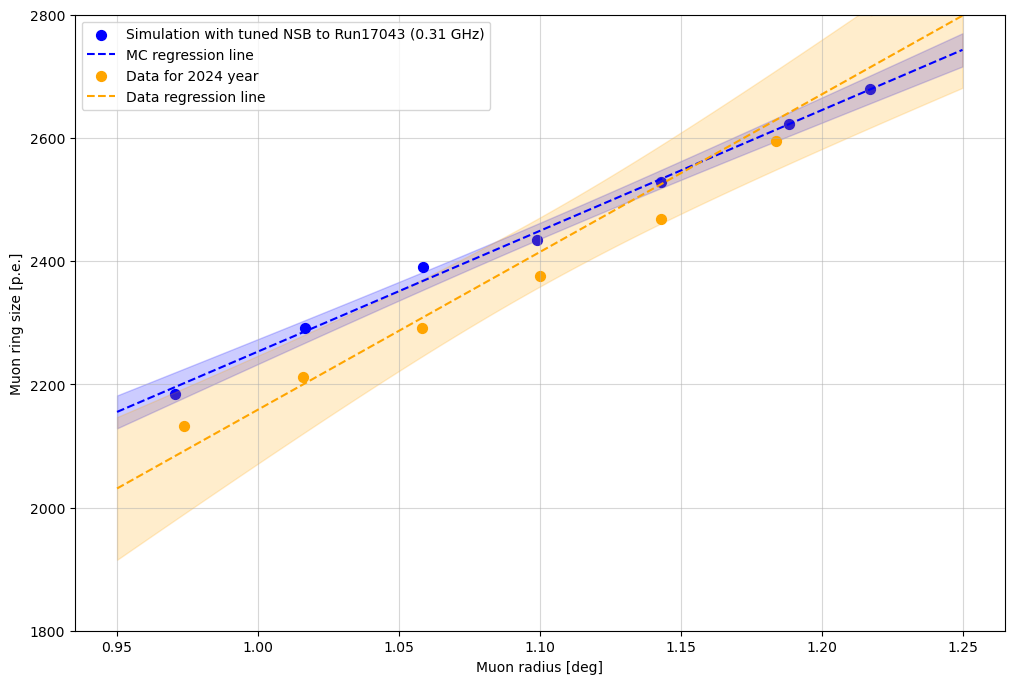

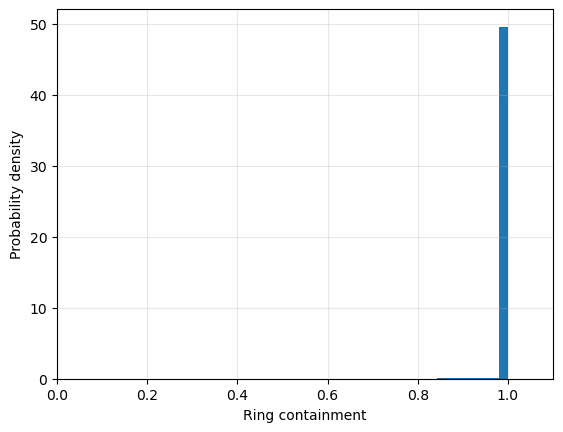

In [137]:
plt.hist(df_good_data_real['ring_containment'][df_good_data_real['ring_completeness'] > 0.99],density=True, bins = 10)
#plt.hist(df_good_data_real['ring_containment'],density=True, bins = 10, alpha = 0.7)
#plt.ylim(0,2)
plt.xlabel('Ring containment')
plt.ylabel('Probability density')
plt.xlim(0,1.1)
plt.grid(alpha = 0.3)
plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/lst_reco_call/containment_only_full_rings.pdf', dpi=200, format='pdf', bbox_inches='tight')

Text(0, 0.5, 'Probability density')

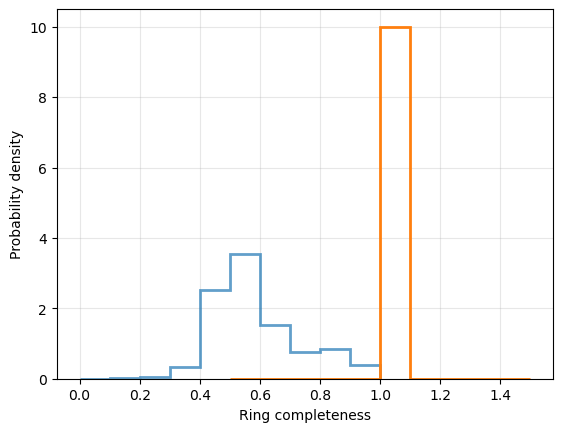

In [133]:
plt.hist(df_good_data_real['ring_completeness'],density=True, bins = 10, alpha = 0.7, histtype='step', linewidth = 2)
plt.hist(df_sim_['ring_completeness'],density=True, bins=10, histtype='step', linewidth = 2, label='Simulation')
plt.grid(alpha = 0.3)
plt.xlabel('Ring completeness')
plt.ylabel('Probability density')
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/lst_reco_call/completeness.pdf', dpi=200, format='pdf', bbox_inches='tight')

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/840988082.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1569/840988082.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


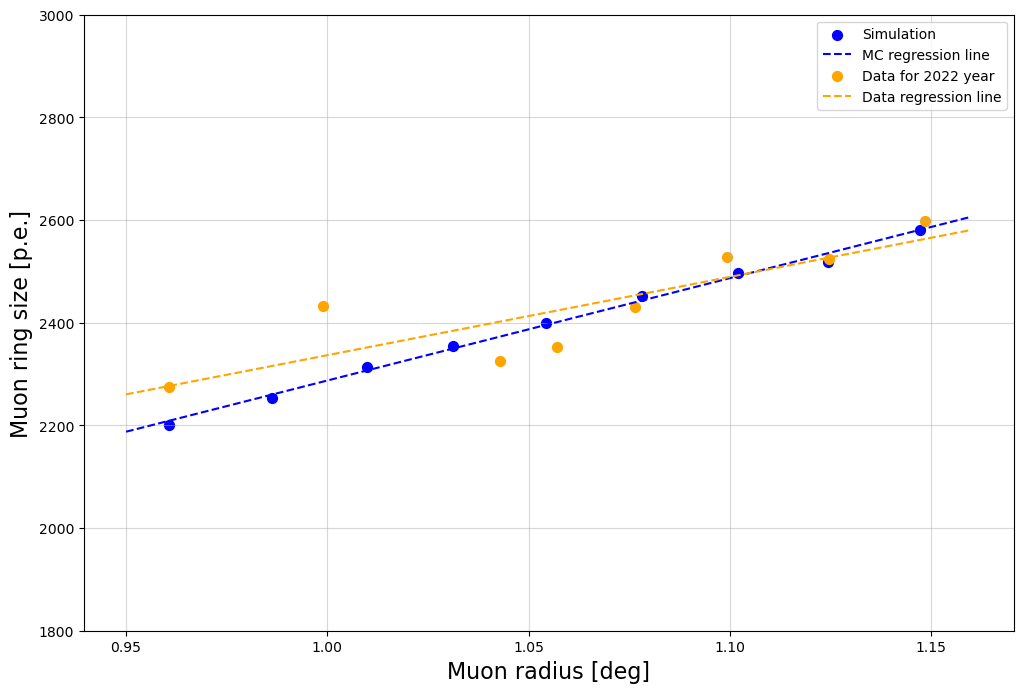

In [30]:
year_value = 2022
data_mc = df_sim_cut
# data_mc = df_sim_data_global_integration_cor_nsbtune[
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] > min_radius_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] < max_radius_cut) &
#     (df_sim_data_global_integration_cor_nsbtune['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_containment'] > ring_containment_cut) 
# ]
data_run = df_sim_cut_nsbtune
#data_run = df_real_data_stacked

# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_mc['ring_size'] = binned_mc['ring_size']
binned_mc['constant'] = 1
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()
# Generate y values and confidence intervals using the regression models
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()


# # Bin the data for MC
# df_real_data_cut_2021['binned_radius'] = pd.cut(df_real_data_cut_2021['ring_radius'], bins, include_lowest=True, labels=False)
# binned_data_2021 = df_real_data_cut_2021.groupby('binned_radius').agg({
#     'ring_radius': 'mean',
#     'ring_size': 'mean'
# })
# binned_data_2021['ring_size'] = binned_data_2021['ring_size']
# binned_data_2021['constant'] = 1
# model_data_2021 = sm.OLS(binned_data_2021['ring_size'], binned_data_2021[['constant', 'ring_radius']]).fit()
# # Generate y values and confidence intervals using the regression models
# y_values_data_2021 = model_data_2021.predict(x_values_with_const)
# prediction_data_2021 = model_data_2021.get_prediction(x_values_with_const)
# conf_int_mc_2021 = prediction_data_2021.conf_int()


# Bin the data for Run
data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
binned_run = data_run.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run['constant'] = 1
model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
y_values_run = model_run.predict(x_values_with_const)
prediction_run = model_run.get_prediction(x_values_with_const)
conf_int_run = prediction_run.conf_int()


# Plotting
plt.figure(figsize=(12, 8))

# Plotting MC data
plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Simulation', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--', label='MC regression line')
#plt.fill_between(x_values, conf_int_mc[:, 0], conf_int_mc[:, 1], color='blue', alpha=0.2)

# plt.scatter(binned_data_2021['ring_radius'], binned_data_2021['ring_size'], color='blue', label='Simulation with tuned NSB to Run17043 (0.31 GHz)', s=50)
# plt.plot(x_values, y_values_data_2021, color='blue', linestyle='--', label='MC regression line')
# plt.fill_between(x_values, conf_int_data_2021[:, 0], conf_int_data_2021[:, 1], color='', alpha=0.2)

# Plotting Data Run
plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], color='orange', label=f'Data for {year_value} year', s=50)

plt.plot(x_values, y_values_run, color='orange', linestyle='--', label='Data regression line')
#plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], color='orange', alpha=0.2)


# Adding labels and legend
plt.xlabel('Muon radius [deg]',fontsize=16)
plt.ylabel('Muon ring size [p.e.]',fontsize=16)
plt.legend()
plt.ylim(1800,3000)
plt.grid(alpha=0.5)
#plt.title(f"Quality cuts containment > {ring_containment_cut} completeness > {ring_completeness_cut}")
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/cuts_investigation/size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

binned_radius
0    0.011742
1    0.017323
2   -0.014434
3    0.012680
4   -0.001456
5    0.003786
6    0.010088
7    0.008299
8   -0.005137
Name: ring_size, dtype: float32

### RADIUS HIST

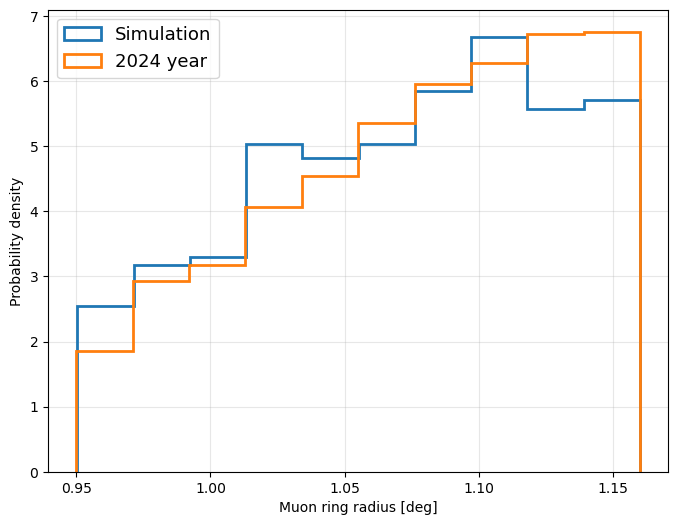

In [129]:
plt.figure(figsize=(8, 6))
plt.hist(df_sim_cut['ring_radius'],density=True, bins=10, histtype='step', linewidth = 2, label='Simulation')

#plt.hist(df_real_data_cut_2020['ring_radius'],density=True, bins=20, histtype='step', linewidth = 2, label='2020 year')
#plt.hist(df_real_data_cut_2021['ring_radius'],density=True, bins=20, histtype='step', linewidth = 2, label='2021 year')
#plt.hist(df_real_data_cut_2022['ring_radius'],density=True, bins=20, histtype='step', linewidth = 2, label='2022 year')
#plt.hist(df_real_data_cut_2023['ring_radius'],density=True, bins=10, histtype='step', linewidth = 2, label='2023 year')
plt.hist(df_real_data_cut_2024['ring_radius'],density=True, bins=10, histtype='step', linewidth = 2, label='2024 year')

plt.grid(alpha = 0.3)
plt.xlabel('Muon ring radius [deg]')
plt.ylabel('Probability density')
plt.legend(loc = 'upper left', fontsize = 13) 
plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/radius_hist_2024yearVSsim_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

Text(0, 0.5, 'Probability density')

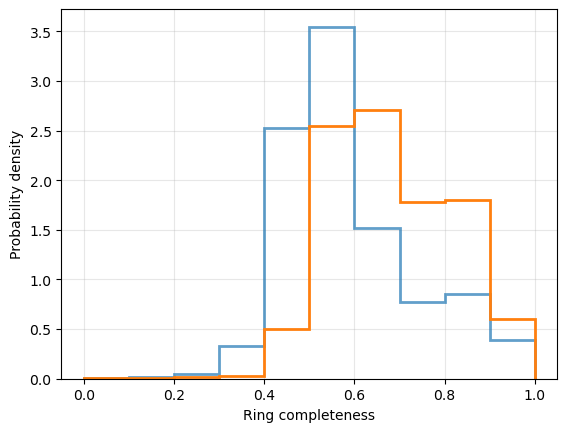

In [134]:
plt.hist(df_good_data_real['ring_completeness'],density=True, bins = 10, alpha = 0.7, histtype='step', linewidth = 2)
plt.hist(df_sim_zenith10['ring_completeness'],density=True, bins=10, histtype='step', linewidth = 2, label='Simulation')
plt.grid(alpha = 0.3)
plt.xlabel('Ring completeness')
plt.ylabel('Probability density')
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/lst_reco_call/completeness.pdf', dpi=200, format='pdf', bbox_inches='tight')
